# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#set a counter for city index
index_count = 0

# establish initial lists for our dataframe
City_ID = []
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

# loop thru API call and pull data for each city
for city in cities:
    # try/except call to open weather api to pull data for each city
    try:
        # api call
        response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}')
        results=response.json()
        
        # add 1 to count to city count for each iteration
        index_count += 1
        
        # append data to our DF
        City_ID.append(results['id'])
        City.append(results['name'])
        Cloudiness.append(results['clouds']['all'])
        Country.append(results['sys']['country'])
        Date.append(results['dt'])
        Humidity.append(results['main']['humidity'])
        Lat.append(results['coord']['lat'])
        Lng.append(results['coord']['lon'])
        Max_Temp.append(results['main']['temp_max'])
        Wind_Speed.append(results['wind']['speed'])
        
        # Print log of each city as it's being processed
        print(f'City Name: {city} - City Number: {index_count}')
       
        
    except:
        # print value if not found
        print('City not Found, skipping...')

City Name: ndele - City Number: 1
City Name: vaini - City Number: 2
City not Found, skipping...
City not Found, skipping...
City Name: ribeira grande - City Number: 5
City not Found, skipping...
City Name: tuktoyaktuk - City Number: 7
City Name: kodiak - City Number: 8
City Name: kruisfontein - City Number: 9
City Name: nukus - City Number: 10
City Name: severodvinsk - City Number: 11
City Name: dikson - City Number: 12
City not Found, skipping...
City Name: hilo - City Number: 14
City Name: paamiut - City Number: 15
City Name: hofn - City Number: 16
City not Found, skipping...
City Name: college - City Number: 18
City Name: pevek - City Number: 19
City Name: maragogi - City Number: 20
City not Found, skipping...
City Name: san alberto - City Number: 22
City Name: port alfred - City Number: 23
City Name: thompson - City Number: 24
City Name: bluff - City Number: 25
City Name: cape town - City Number: 26
City not Found, skipping...
City Name: esperance - City Number: 28
City Name: half 

City Name: kununurra - City Number: 217
City Name: fairbanks - City Number: 218
City Name: denison - City Number: 219
City Name: boueni - City Number: 220
City Name: fort nelson - City Number: 221
City Name: maniitsoq - City Number: 222
City Name: sambava - City Number: 223
City Name: aylesbury - City Number: 224
City not Found, skipping...
City Name: kavaratti - City Number: 226
City Name: eldorado - City Number: 227
City Name: maxixe - City Number: 228
City Name: iqaluit - City Number: 229
City Name: bonnyville - City Number: 230
City Name: kavieng - City Number: 231
City Name: manokwari - City Number: 232
City not Found, skipping...
City Name: maldonado - City Number: 234
City Name: teahupoo - City Number: 235
City Name: kandrian - City Number: 236
City Name: belmonte - City Number: 237
City Name: poum - City Number: 238
City Name: aleksandrov gay - City Number: 239
City Name: prieska - City Number: 240
City Name: oneonta - City Number: 241
City Name: miyako - City Number: 242
City 

City not Found, skipping...
City Name: kaifeng - City Number: 433
City Name: byron bay - City Number: 434
City Name: chenghai - City Number: 435
City Name: manuk mangkaw - City Number: 436
City Name: daru - City Number: 437
City Name: ghanzi - City Number: 438
City Name: prince rupert - City Number: 439
City Name: whyalla - City Number: 440
City Name: parfenyevo - City Number: 441
City Name: albania - City Number: 442
City Name: mildura - City Number: 443
City not Found, skipping...
City Name: masterton - City Number: 445
City Name: olafsvik - City Number: 446
City Name: puerto escondido - City Number: 447
City Name: asau - City Number: 448
City Name: saint-joseph - City Number: 449
City Name: kidal - City Number: 450
City Name: andenes - City Number: 451
City Name: boca do acre - City Number: 452
City Name: aquin - City Number: 453
City Name: bone - City Number: 454
City not Found, skipping...
City Name: sinaloa - City Number: 456
City not Found, skipping...
City Name: borba - City Nu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#convert the lists into one dataframe
weather_df=pd.DataFrame([City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed])
weather_df=weather_df.transpose()
weather_df.columns = ['City ID', 'City', 'Cloudiness','Country', 'Date', 'Humidity','Lat','Lng',
                      'Max Temp', 'Wind Speed']
weather_df

#export the dataframe into a .csv file
weather_df.to_csv('output_data/weather.csv', index=False)
pd.read_csv('output_data/weather.csv')

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,237379,Ndélé,0,CF,1612288596,21,8.4109,20.6473,82.56,1.39
1,4032243,Vaini,90,TO,1612288597,100,-21.2000,-175.2000,77.00,14.97
2,3372707,Ribeira Grande,40,PT,1612288600,62,38.5167,-28.7000,57.20,26.46
3,6170031,Tuktoyaktuk,20,CA,1612288601,68,69.4541,-133.0374,-29.20,5.75
4,5866583,Saint Paul Harbor,90,US,1612288565,86,57.7900,-152.4072,26.60,4.99
...,...,...,...,...,...,...,...,...,...,...
537,482986,Tim,90,RU,1612289239,86,51.6222,37.1244,24.80,6.71
538,103630,Najrān,0,SA,1612289240,32,17.4924,44.1277,68.00,6.91
539,1261309,Nipāni,0,IN,1612289240,34,16.4000,74.3833,71.20,5.23
540,3372783,Ponta Delgada,20,PT,1612289241,67,37.7333,-25.6667,57.20,24.16


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
#humidity=[]
#for city in weather_df:
 #   if index=weather_df.loc[weather_df['Humidity']>100].index
   # humidity.append(index)
#humidity


#  Get the indices of cities that have humidity over 100%.
#need to determine if this is looking at all rows?
index = weather_df.loc[weather_df['Humidity']>100].index
index
#no city with humidity greater than 100 found

Int64Index([], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = weather_df.drop(index, inplace=False)
clean_city_df


,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,237379,Ndélé,0,CF,1612288596,21,8.4109,20.6473,82.56,1.39
1,4032243,Vaini,90,TO,1612288597,100,-21.2,-175.2,77,14.97
2,3372707,Ribeira Grande,40,PT,1612288600,62,38.5167,-28.7,57.2,26.46
3,6170031,Tuktoyaktuk,20,CA,1612288601,68,69.4541,-133.037,-29.2,5.75
4,5866583,Saint Paul Harbor,90,US,1612288565,86,57.79,-152.407,26.6,4.99
...,...,...,...,...,...,...,...,...,...,...
537,482986,Tim,90,RU,1612289239,86,51.6222,37.1244,24.8,6.71
538,103630,Najrān,0,SA,1612289240,32,17.4924,44.1277,68,6.91
539,1261309,Nipāni,0,IN,1612289240,34,16.4,74.3833,71.2,5.23
540,3372783,Ponta Delgada,20,PT,1612289241,67,37.7333,-25.6667,57.2,24.16


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

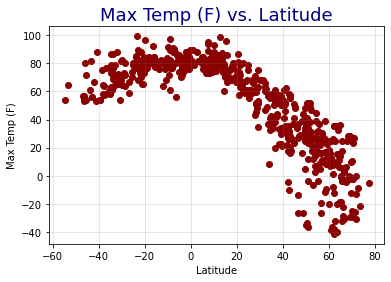

In [9]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Max Temp'], color='darkred')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(color='grey', alpha=.25)
plt.title('Max Temp (F) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 18,
                     'fontweight' : 5,
                     'color' : 'navy'})
plt.show()

## Latitude vs. Humidity Plot

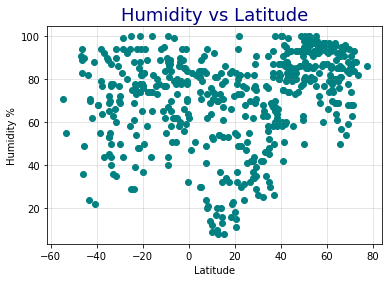

In [10]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Humidity'], color='teal')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid(color='grey', alpha=.25)
plt.title('Humidity vs Latitude',
          loc='center',
          fontdict={'fontsize': 18,
                     'fontweight' : 5,
                     'color' : 'navy'})
plt.show()

## Latitude vs. Cloudiness Plot

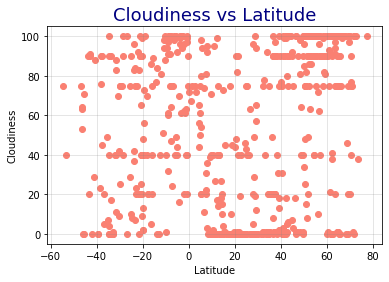

In [11]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Cloudiness'], color='salmon')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(color='grey', alpha=.25)
plt.title('Cloudiness vs Latitude',
          loc='center',
          fontdict={'fontsize': 18,
                     'fontweight' : 2,
                     'color' : 'navy'})
plt.show()

## Latitude vs. Wind Speed Plot

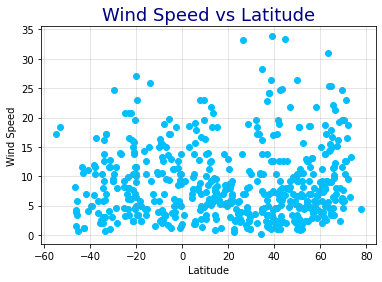

In [12]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Wind Speed'], color='deepskyblue')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(color='grey', alpha=.25)
plt.title('Wind Speed vs Latitude',
          loc='center',
          fontdict={'fontsize': 18,
                     'fontweight' : 2,
                     'color' : 'navy'})
plt.show()

## Linear Regression

In [17]:
#create dataframes for citys in northern and souther hemispheres
NH_df = clean_city_df.loc[clean_city_df['Lat']>=0]
SH_df = clean_city_df.loc[clean_city_df['Lat']<0]


,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,4032243,Vaini,90,TO,1612288597,100,-21.2,-175.2,77,14.97
5,986717,Kruisfontein,0,ZA,1612288603,70,-34.0033,24.7314,73.99,3
14,3395458,Maragogi,32,BR,1612288614,67,-9.0122,-35.2225,82.69,13.29
16,964432,Port Alfred,0,ZA,1612288618,87,-33.5906,26.891,69.01,5.99
18,2206939,Bluff,75,NZ,1612288469,91,-46.6,168.333,57,8.1
...,...,...,...,...,...,...,...,...,...,...
519,3836277,Santa Fe,88,AR,1612289221,94,-31.6333,-60.7,69.01,4
523,3662927,Pauini,47,BR,1612289226,65,-7.7136,-66.9764,88.54,3.15
531,3860259,Córdoba,40,AR,1612289236,60,-31.4135,-64.1811,69.8,11.5
533,1633419,Padang,40,ID,1612289237,94,-0.9492,100.354,77,1.14


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

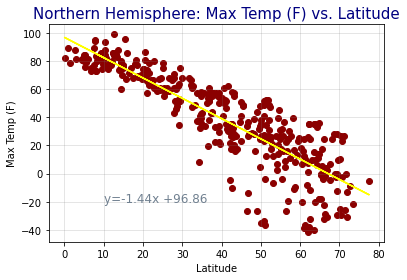

In [39]:
#create scatter plot and format as needed
plt.scatter(NH_df['Lat'],NH_df['Max Temp'], color='darkred')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere: Max Temp (F) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 5,
                     'color' : 'navy'})
# Calculate the correlation coefficient and linear regression model
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_df['Lat'].astype('float'),
                                                        NH_df['Max Temp'].astype('float'))
regression_line = NH_df['Lat']*slope+intercept
#plot the regression line and format as needed
equation = 'y=' + str(round(slope,2))+"x +" + str(round(intercept,2))
plt.plot(NH_df['Lat'],regression_line,color='yellow')
plt.annotate(equation,(10,-20),fontsize=12,color='slategrey')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

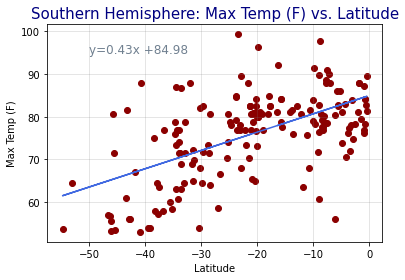

In [40]:
#create scatter plot and format as needed
plt.scatter(SH_df['Lat'],SH_df['Max Temp'], color='darkred')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere: Max Temp (F) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 5,
                     'color' : 'navy'})
# Calculate the correlation coefficient and linear regression model
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_df['Lat'].astype('float'),
                                                        SH_df['Max Temp'].astype('float'))
regression_line = SH_df['Lat']*slope+intercept
#plot the regression line and format as needed
equation = 'y=' + str(round(slope,2))+"x +" + str(round(intercept,2))
plt.plot(SH_df['Lat'],regression_line,color='royalblue')
plt.annotate(equation,(-50,95),fontsize=12,color='slategrey')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

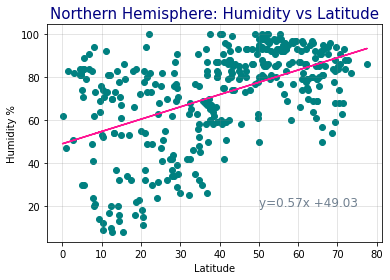

In [41]:
#create scatter plot and format as needed
plt.scatter(NH_df['Lat'],NH_df['Humidity'], color='teal')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere: Humidity vs Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 5,
                     'color' : 'navy'})
# Calculate the correlation coefficient and linear regression model
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_df['Lat'].astype('float'),
                                                        NH_df['Humidity'].astype('float'))
regression_line = NH_df['Lat']*slope+intercept
#plot the regression line and format as needed
equation = 'y=' + str(round(slope,2))+"x +" + str(round(intercept,2))
plt.plot(NH_df['Lat'],regression_line,color='deeppink')
plt.annotate(equation,(50,20),fontsize=12,color='slategrey')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

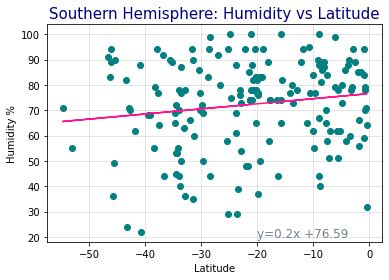

In [42]:
#create scatter plot and format as needed
plt.scatter(SH_df['Lat'],SH_df['Humidity'], color='teal')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere: Humidity vs Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 5,
                     'color' : 'navy'})
# Calculate the correlation coefficient and linear regression model
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_df['Lat'].astype('float'),
                                                        SH_df['Humidity'].astype('float'))
regression_line = SH_df['Lat']*slope+intercept
#plot the regression line and format as needed
equation = 'y=' + str(round(slope,2))+"x +" + str(round(intercept,2))
plt.plot(SH_df['Lat'],regression_line,color='deeppink')
plt.annotate(equation,(-20,20),fontsize=12,color='slategrey')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

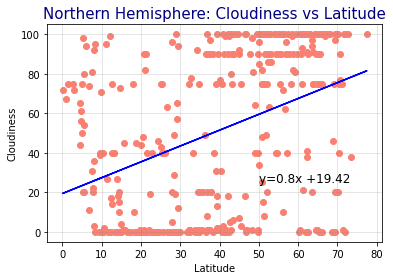

In [49]:
#create scatter plot and format as needed
plt.scatter(NH_df['Lat'],NH_df['Cloudiness'], color='salmon')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere: Cloudiness vs Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 2,
                     'color' : 'navy'})
# Calculate the correlation coefficient and linear regression model
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_df['Lat'].astype('float'),
                                                        NH_df['Cloudiness'].astype('float'))
regression_line = NH_df['Lat']*slope+intercept
#plot the regression line and format as needed
equation = 'y=' + str(round(slope,2))+"x +" + str(round(intercept,2))
plt.plot(NH_df['Lat'],regression_line,color='blue')
plt.annotate(equation,(50,25),fontsize=12,color='black')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

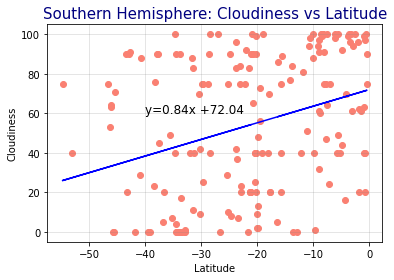

In [51]:
#create scatter plot and format as needed
plt.scatter(SH_df['Lat'],SH_df['Cloudiness'], color='salmon')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere: Cloudiness vs Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 2,
                     'color' : 'navy'})
# Calculate the correlation coefficient and linear regression model
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_df['Lat'].astype('float'),
                                                        SH_df['Cloudiness'].astype('float'))
regression_line = SH_df['Lat']*slope+intercept
#plot the regression line and format as needed
equation = 'y=' + str(round(slope,2))+"x +" + str(round(intercept,2))
plt.plot(SH_df['Lat'],regression_line,color='blue')
plt.annotate(equation,(-40,60),fontsize=12,color='black')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

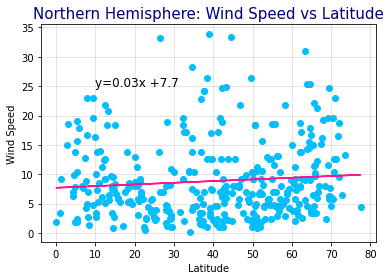

In [54]:
#create scatter plot and format as needed
plt.scatter(NH_df['Lat'],NH_df['Wind Speed'], color='deepskyblue')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere: Wind Speed vs Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 2,
                     'color' : 'navy'})
# Calculate the correlation coefficient and linear regression model
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_df['Lat'].astype('float'),
                                                        NH_df['Wind Speed'].astype('float'))
regression_line = NH_df['Lat']*slope+intercept
#plot the regression line and format as needed
equation = 'y=' + str(round(slope,2))+"x +" + str(round(intercept,2))
plt.plot(NH_df['Lat'],regression_line,color='deeppink')
plt.annotate(equation,(10,25),fontsize=12,color='black')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

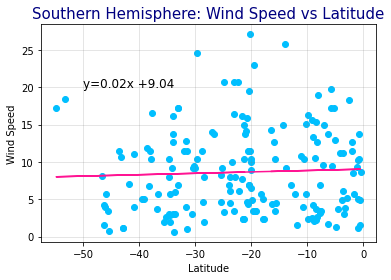

In [56]:
#create scatter plot and format as needed
plt.scatter(SH_df['Lat'],SH_df['Wind Speed'], color='deepskyblue')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere: Wind Speed vs Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 2,
                     'color' : 'navy'})
# Calculate the correlation coefficient and linear regression model
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_df['Lat'].astype('float'),
                                                        SH_df['Wind Speed'].astype('float'))
regression_line = SH_df['Lat']*slope+intercept
#plot the regression line and format as needed
equation = 'y=' + str(round(slope,2))+"x +" + str(round(intercept,2))
plt.plot(SH_df['Lat'],regression_line,color='deeppink')
plt.annotate(equation,(-50,20),fontsize=12,color='black')
plt.show()